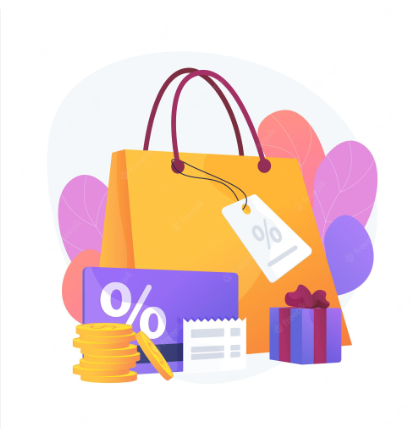

We like shopping online. The main appeal is that we can find and buy items we require without ever needing to leave the house.

Online shopping platforms often utilize data analytics to offer personalized recommendations, enhancing the consumer’s shopping experience.

Lets look at the data of a superstore in US and get some insights from it.

In [ ]:
#importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Reading the Data**

In [ ]:
store=pd.read_csv('/content/train.csv')

In [ ]:
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
store.shape

(9800, 18)

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Dropping unecessary columns

In [ ]:
store.drop(['Row ID'],axis=1,inplace=True)

Basic descriptive statistics for key numeric variables

In [ ]:
store.describe()

,Postal Code,Sales
count,9789.000000,9800.000000
mean,55273.322403,230.769059
std,32041.223413,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,58103.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


Formatting all the column names in a single format

In [ ]:
store.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

In [ ]:
store.rename(columns=str.lower,inplace=True)
store.columns

Index(['order id', 'order date', 'ship date', 'ship mode', 'customer id',
       'customer name', 'segment', 'country', 'city', 'state', 'postal code',
       'region', 'product id', 'category', 'sub-category', 'product name',
       'sales'],
      dtype='object')

In [ ]:
store=store.rename(columns={'order id':'order_id',
                       'order date':'order_date',
                       'ship date':'ship_date',
                       'ship mode':'ship_mode',
                       'customer id':'customer_id',
                       'customer name':'customer_name',
                       'postal code':'postal_code',
                       'product id':'product_id',
                       'sub-category':'sub_category',
                       'product name':'product_name'})

In [ ]:
##checking data type of columns
store.dtypes

order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code      float64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
dtype: object

Dropping Duplicates

In [ ]:
store.duplicated().sum()

1

In [ ]:
dup=store.duplicated()

In [ ]:
store[dup]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
3406,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [ ]:
store=store.drop_duplicates()

Checking Missing values

In [ ]:
store.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
dtype: int64

Showing the rows which have empty postal code values.

In [ ]:
store[store['postal_code'].isna()]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
2234,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Filling the postal code value for city Burlington and state Vermont

In [ ]:
store['postal_code'] = store['postal_code'].fillna('05401')

In [ ]:
store['postal_code']=store['postal_code'].astype(object)

Order_ID

In [ ]:
store['order_id'].value_counts()

CA-2018-100111    14
CA-2018-157987    12
US-2017-108504    11
CA-2017-165330    11
CA-2016-131338    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: order_id, Length: 4922, dtype: int64

In [ ]:
store['order_id'].dtype

dtype('O')

Converting order date and ship date into Date datatype

In [ ]:
store['order_date'].value_counts()

05/09/2017    38
10/11/2017    35
02/12/2018    34
01/12/2018    34
02/09/2018    33
              ..
25/02/2017     1
25/10/2017     1
21/02/2015     1
11/09/2015     1
09/05/2016     1
Name: order_date, Length: 1230, dtype: int64

In [ ]:
store['order_date'] = pd.to_datetime(store['order_date'])

In [ ]:
store['ship_date'] = pd.to_datetime(store['ship_date'])

Ship Mode

In [ ]:
store['ship_mode'].value_counts()

Standard Class    5858
Second Class      1902
First Class       1501
Same Day           538
Name: ship_mode, dtype: int64

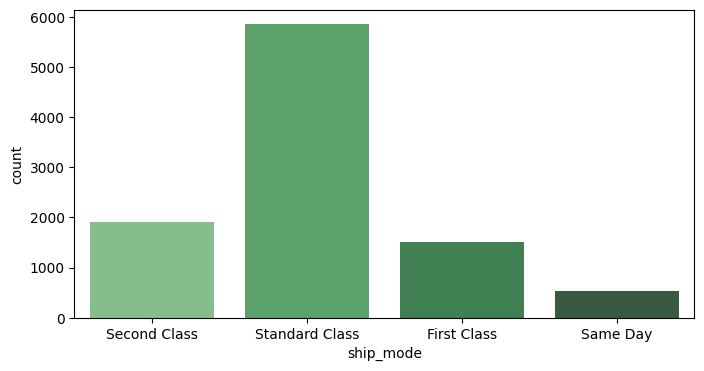

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='ship_mode',data=store,palette='Greens_d')
plt.show()

Majority of the customers prefer the Standard Class Shipping mode.

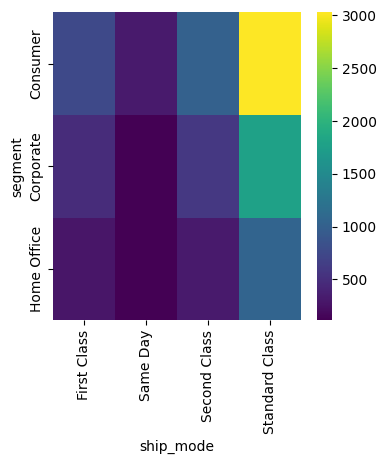

In [ ]:
plt.subplots(figsize=(4,4))
df_2dhist = pd.DataFrame({
    x_label: grp['segment'].value_counts()
    for x_label, grp in store.groupby('ship_mode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ship_mode')
_ = plt.ylabel('segment')

Segment wise Analysis

In [ ]:
store['segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1745
Name: segment, dtype: int64

<Axes: >

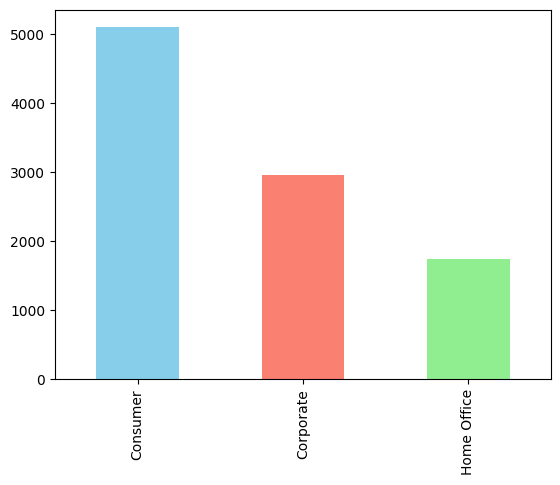

In [ ]:
store['segment'].value_counts().plot(kind='bar',color=['skyblue', 'salmon', 'lightgreen'])

The distribution is highest in Consumer Segment.

# **Location wise Analysis**

**Region**

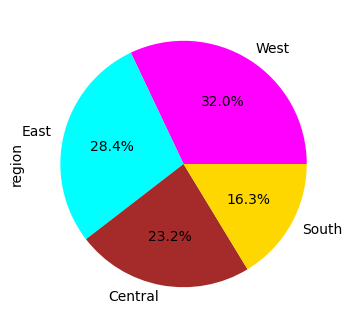

In [ ]:
plt.figure(figsize=(6,4))
store['region'].value_counts().plot.pie(colors = ['magenta','cyan','brown','gold'],autopct="%1.1f%%")
plt.show()

Most of the orders are from West and East region.


Least of all orders from the southern region.

**State**

In [ ]:
store['state'].value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     453
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

In [ ]:
# top 10 states
top_states = store.groupby(['state']).sum().sort_values('sales', ascending=False).head(10)
top_states = top_states[['sales']].round(2)
top_states.reset_index(inplace=True)
top_states

,state,sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,74848.98
9,Virginia,70636.72


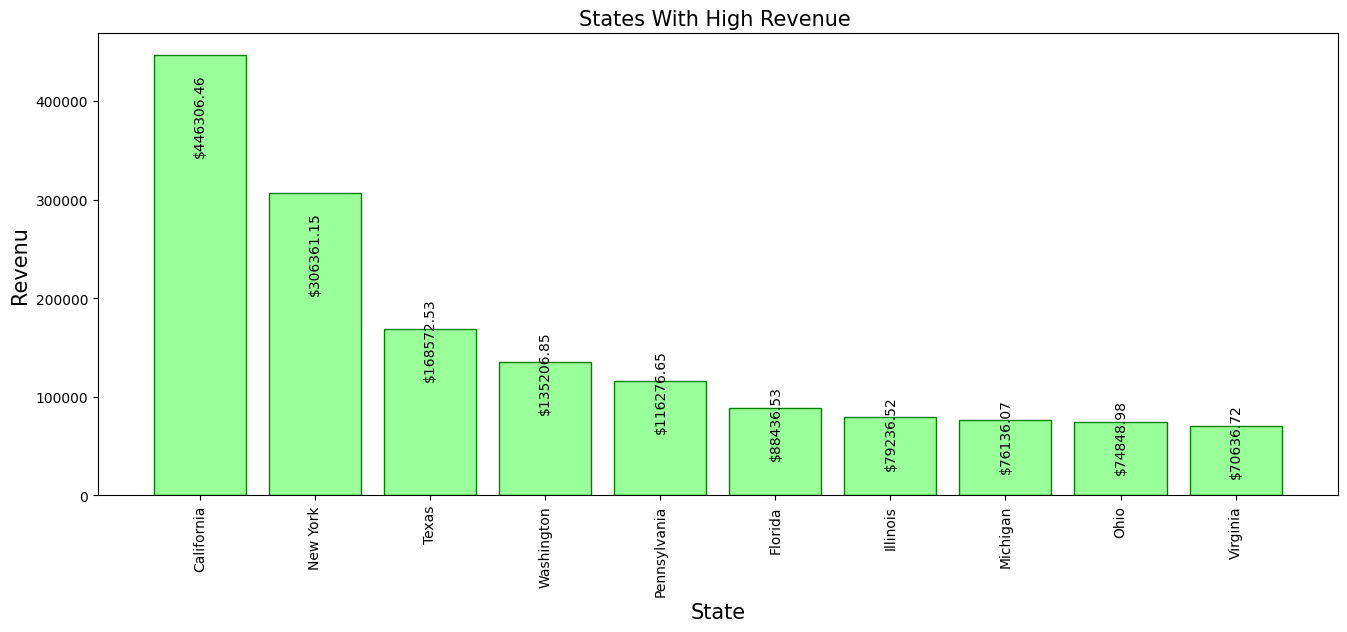

In [ ]:
# visualize top 10 states
plt.figure(figsize=(16,6))
plt.bar(top_states['state'],top_states['sales'] ,color="#99ff99" , edgecolor='green')
plt.xticks(rotation='vertical')
plt.title('States With High Revenue ',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Revenu',fontsize=15)

for k , v in top_states['sales'].items():
    if v > 200000 :
        plt.text(k,v-100000,"$"+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-50000,"$"+str(v),rotation=90,horizontalalignment='center')

The top 3 major states are California,New York and Texas.

**City**

In [ ]:
store['city'].value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: city, Length: 529, dtype: int64

<Axes: >

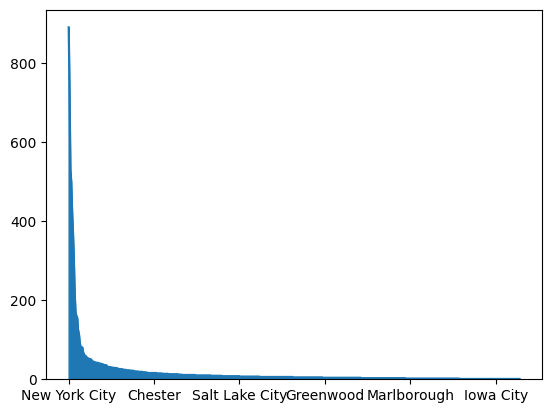

In [ ]:
store['city'].value_counts().plot(kind='area')

In [ ]:
# top 10 cities
top_city = store.groupby(['city']).sum().sort_values('sales', ascending=False).head(10)
top_city = top_city[['sales']].round(2)
top_city.reset_index(inplace=True)
top_city

,city,sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


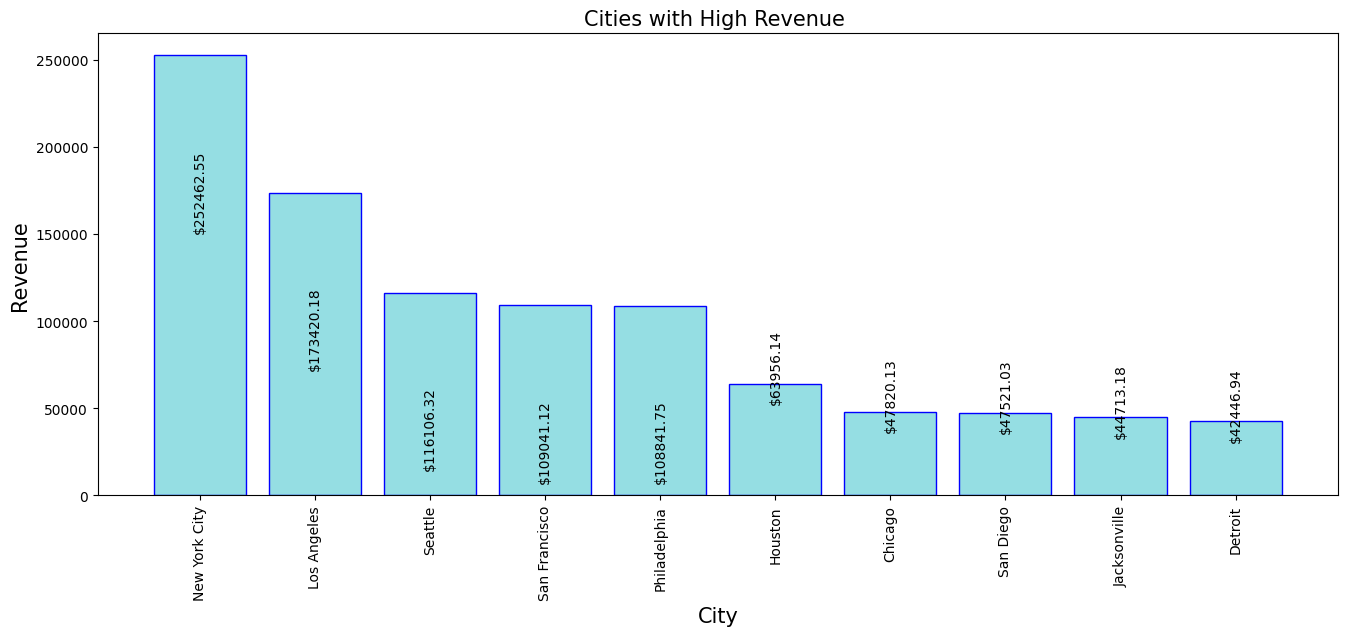

In [ ]:
# visualize top 10 cities
plt.figure(figsize=(16,6))
plt.bar(top_city['city'],top_city['sales'] ,color="#95dee3" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('Cities with High Revenue ',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.ylabel('Revenue',fontsize=15)

for k , v in top_city['sales'].items():
    if v > 100000 :
        plt.text(k,v-100000,"$"+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-10000,"$"+str(v),rotation=90,horizontalalignment='center')

The majority of the Profitable Customers are from New York and Los Angeles.

# **Catergory wise Analysis**

The product categories available to shop for customers are:

In [ ]:
store['category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
#number of products in each category
store['category'].value_counts()

Office Supplies    5909
Furniture          2077
Technology         1813
Name: category, dtype: int64

<Axes: >

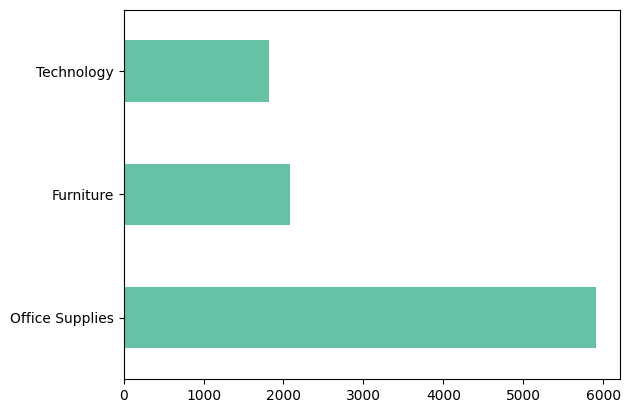

In [ ]:
store['category'].value_counts().plot(kind='barh',colormap='Set2')

In [ ]:
#number of Sub-categories products are divided.
store['sub_category'].nunique()

17

<Axes: >

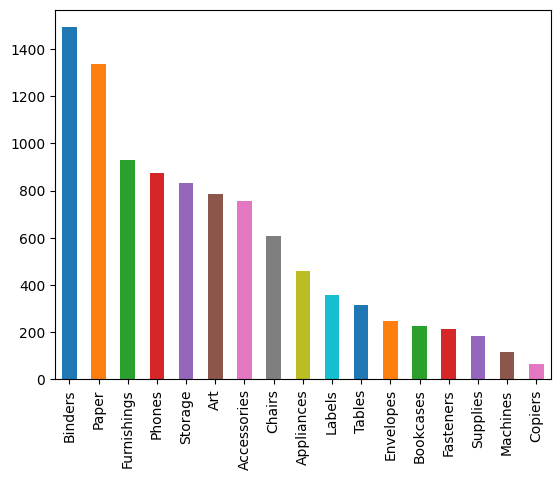

In [ ]:
#number of products in each sub-category
store['sub_category'].value_counts().plot(kind='bar',color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

The store has wide variety of Office Supplies


Blinders and Paper are clear leaders in sales among customers.

# **Product wise Analysis**

In [ ]:
#products available in store
store['product_name'].value_counts()

Staple envelope                                                        47
Staples                                                                46
Easy-staple paper                                                      44
Avery Non-Stick Binders                                                20
Staples in misc. colors                                                18
                                                                       ..
Xiaomi Mi3                                                              1
Universal Ultra Bright White Copier/Laser Paper, 8 1/2" x 11", Ream     1
Socket Bluetooth Cordless Hand Scanner (CHS)                            1
Logitech Illuminated Ultrathin Keyboard with Backlighting               1
LG G2                                                                   1
Name: product_name, Length: 1849, dtype: int64

<Axes: ylabel='product_name'>

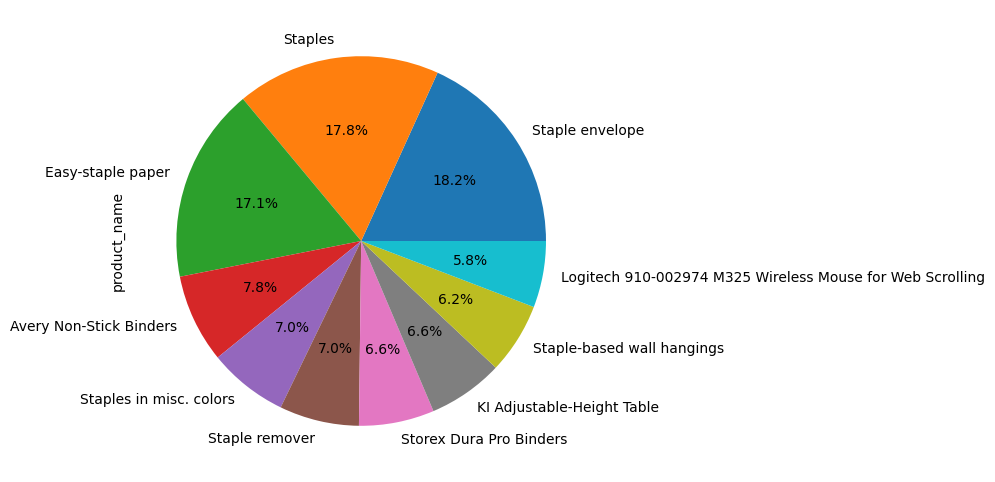

In [ ]:
#Distribution of Top 10 Products
plt.figure(figsize=(10,6))
store['product_name'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

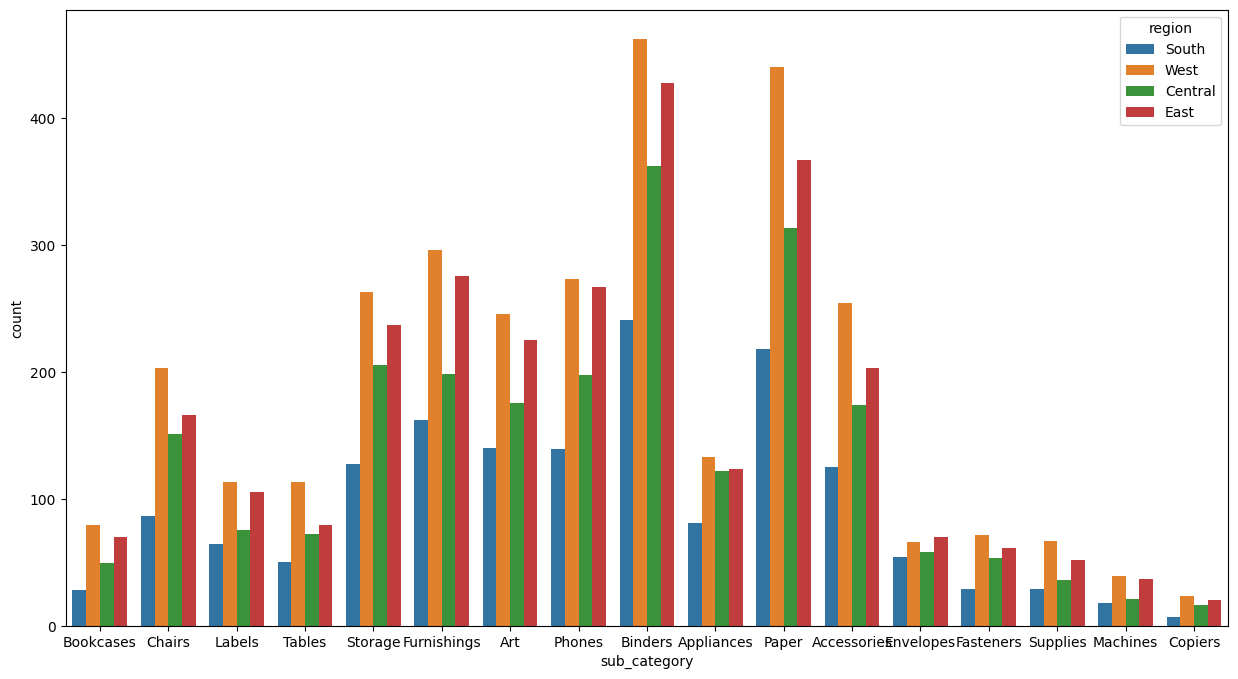

In [ ]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="sub_category", hue="region", data=store)
plt.show()

People residing in Western part of US tend to order more from superstore.

Binders,Papers,Furnishings are the most ordered items

# **Customer wise Analysis**

The data w.r.t customer level

In [ ]:
#Top 10 customers who order frequently
store_top10=store['customer_name'].value_counts().head(10)
store_top10

William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
Jonathan Doherty       32
Seth Vernon            32
Emily Phan             31
Zuschuss Carroll       31
Arthur Prichep         31
Name: customer_name, dtype: int64

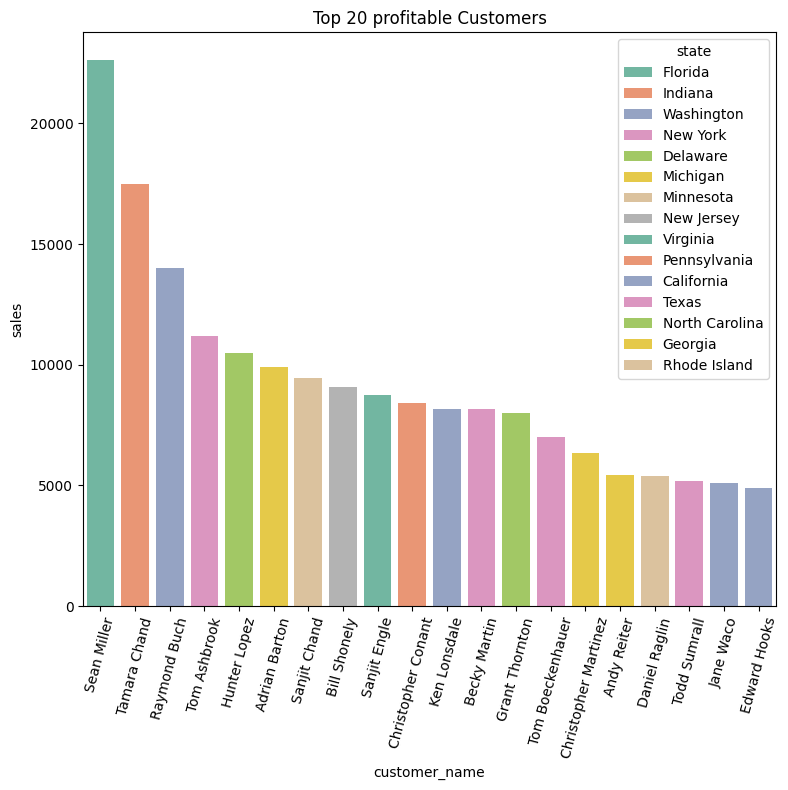

In [ ]:
#Top 20 Customers who benefitted the store
sortedTop20 = store.sort_values(['sales'], ascending=False).head(20)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='customer_name', y='sales',hue='state',palette='Set2', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

Most ordered customers are from Newyork and Michigan

# **Yearly Analysis**

In [ ]:
store['year'] = store['order_date'].dt.year

In [ ]:
store['year'].value_counts()

2018    3258
2017    2534
2016    2055
2015    1952
Name: year, dtype: int64

<BarContainer object of 9799 artists>

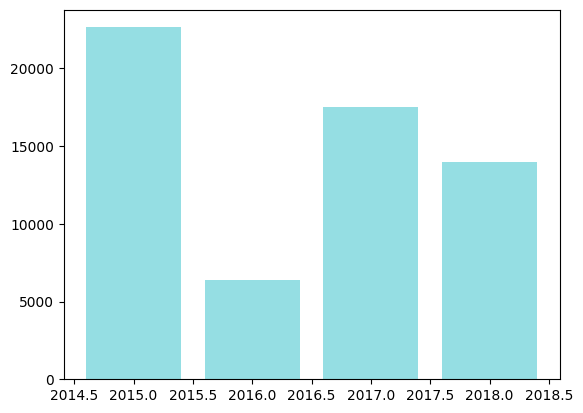

In [ ]:
# visualize sales in each year
plt.bar(store['year'],store['sales'] ,color="#95dee3")

Most of the sales happend between 2014 and 2015.

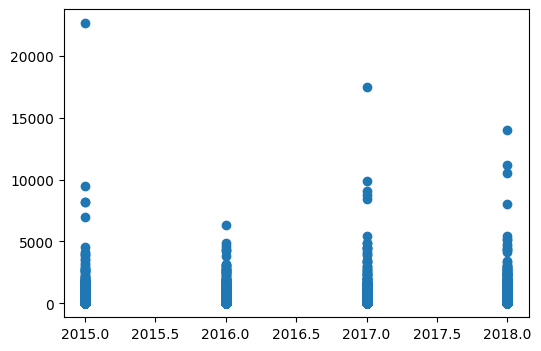

In [ ]:
# scatter plot to get the highest sales in each year
plt.figure(figsize=(6,4))
plt.scatter(store['year'],store['sales'])

## Recommendations

•	Focus on Office Supplies and  sub-category Binders,Papers and Furnishings as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Copiers to offset the losses.

•	Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.

•	For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.

•	For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.

•	Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.

